In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../nd_fixed_beta_2/nd_fixed_results.csv')
df.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,...,ols_est_variance,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,200,0.05,10,0.0,1,0,4,0.872185,1.031528,1.901649,...,1.031209,1.900790,0.874103,1.032441,1.904480,1.060486,1.063511,1.078635,1.228919,1.075775
1,200,0.05,10,0.1,1,0,4,0.986657,0.937733,1.922515,...,0.859006,1.844277,0.986865,0.977423,1.962333,1.207690,1.102857,1.094541,1.236329,1.084742
2,200,0.05,10,0.2,1,0,4,0.758522,0.813489,1.570384,...,0.705245,1.458424,0.759930,0.874805,1.632986,1.408996,1.192693,1.145330,1.256966,1.140260
3,200,0.05,10,0.4,1,0,4,0.544255,0.615024,1.158048,...,0.535673,1.079936,0.544147,0.677625,1.220417,1.976214,1.688930,1.541989,1.335971,1.547907
4,200,0.05,10,0.5,1,0,4,0.658918,0.533266,1.191117,...,0.479324,1.138675,0.658205,0.589199,1.246226,2.314092,2.065730,1.924339,1.469999,1.894862


In [3]:
df.columns

Index(['n', 'p_n', 'p', 'contamination_level', 'ctam_sigma', 'ctam_mu',
       'cook_cutoff', 'robust_m_est_bias', 'robust_m_est_variance',
       'robust_m_est_mse', 'robust_mm_est_bias', 'robust_mm_est_variance',
       'robust_mm_est_mse', 'robust_s_est_bias', 'robust_s_est_variance',
       'robust_s_est_mse', 'ols_est_bias', 'ols_est_variance', 'ols_est_mse',
       'ols_diag_est_bias', 'ols_diag_est_variance', 'ols_diag_est_mse',
       'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe',
       'ols_diag_mspe'],
      dtype='object')

In [4]:
feature_columns = ['n', 'p_n', 'p', 'contamination_level', 'ctam_sigma', 'ctam_mu']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [5]:
df[feature_columns].describe()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu
count,60.0,60.000000,60.00000,60.000000,60.0,60.0
mean,200.0,0.455000,91.00000,0.300000,1.0,0.0
std,0.0,0.282048,56.40952,0.217848,0.0,0.0
min,200.0,0.050000,10.00000,0.000000,1.0,0.0
25%,200.0,0.200000,40.00000,0.100000,1.0,0.0
50%,200.0,0.450000,90.00000,0.300000,1.0,0.0
75%,200.0,0.700000,140.00000,0.500000,1.0,0.0
max,200.0,0.900000,180.00000,0.600000,1.0,0.0


In [15]:
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_est_mse', '')
df_mse.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,method,mse
0,200,0.05,10,0.0,1,0,ols,1.900790
1,200,0.05,10,0.1,1,0,ols,1.844277
2,200,0.05,10,0.2,1,0,ols,1.458424
3,200,0.05,10,0.4,1,0,ols,1.079936
4,200,0.05,10,0.5,1,0,ols,1.138675


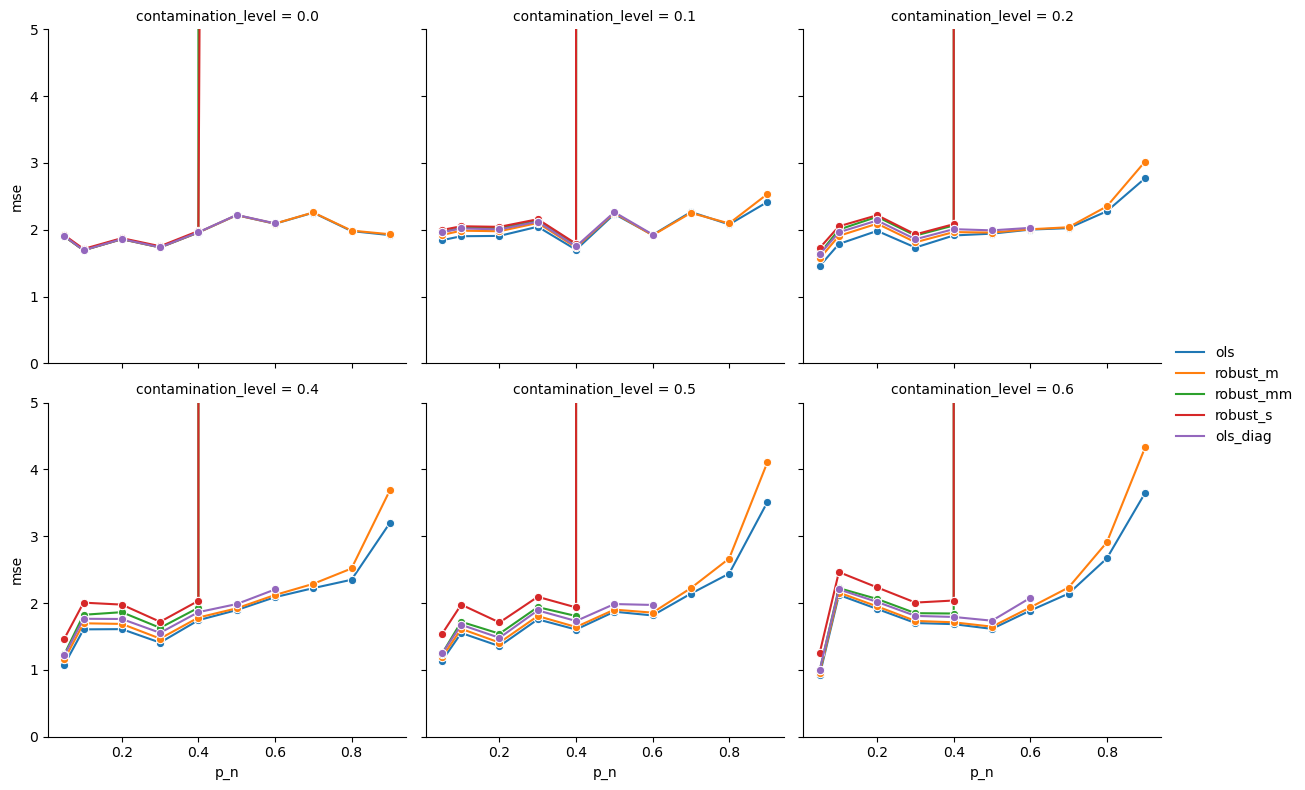

In [19]:
g = sns.FacetGrid(df_mse, col='contamination_level', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'p_n', 'mse', 'method', marker='o')
g.add_legend()
plt.ylim(0,5)
plt.show()

In [20]:
df_mspes = df[feature_columns + mpse_columns]
df_mspes = df_mspes.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mspes['method'] = df_mspes['method'].str.replace('_mspe', '')
df_mspes = df_mspes[(df_mspes['n'] == 200)]

df_mspes.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,method,mpse
0,200,0.05,10,0.0,1,0,ols,1.060486
1,200,0.05,10,0.1,1,0,ols,1.207690
2,200,0.05,10,0.2,1,0,ols,1.408996
3,200,0.05,10,0.4,1,0,ols,1.976214
4,200,0.05,10,0.5,1,0,ols,2.314092


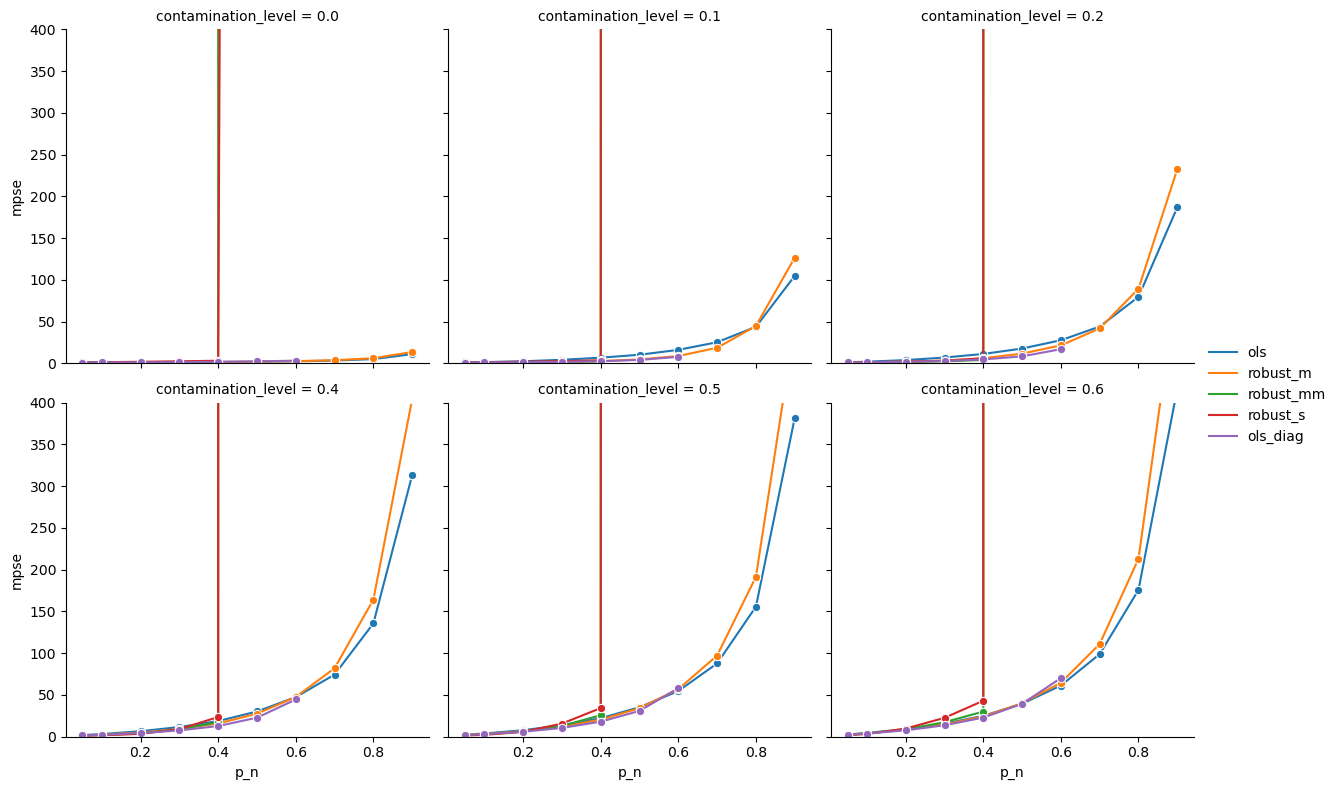

In [22]:
g = sns.FacetGrid(df_mspes, col='contamination_level', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'p_n', 'mpse', 'method', marker='o')
g.add_legend()
plt.ylim(0, 400)
plt.show()

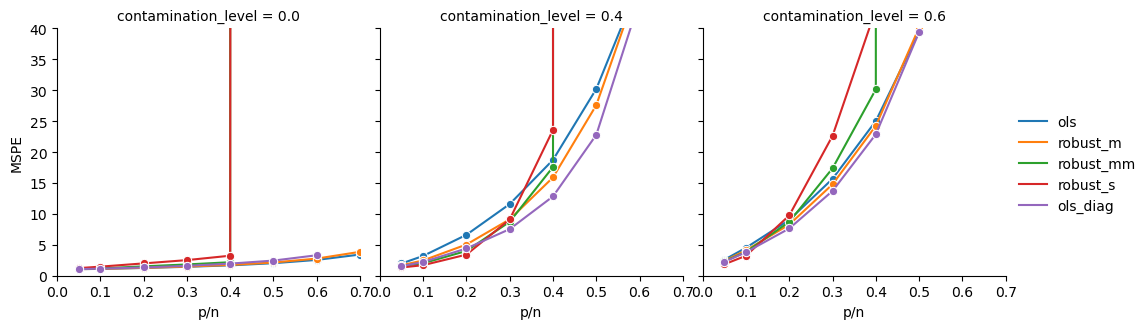

In [39]:
df_mspes = df_mspes[df_mspes['contamination_level'].isin([0,0.4, 0.6])]
g = sns.FacetGrid(df_mspes, col='contamination_level', col_wrap=3, height=3.4, aspect=1)
g.map(sns.lineplot, 'p_n', 'mpse', 'method', marker='o')
g.add_legend()
plt.ylim(0, 40)
plt.xlim(0, 0.7)
# change x axis labels
g.set_axis_labels('p/n')
g.set_ylabels('MSPE')
g.savefig('mspe_pn.png', dpi=300)